## Import data

In [1]:
import pandas as pd 
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv('3d_desc.csv',index_col=0)

In [2]:
df.head()

,Compound,No.,SMILES,Name,CI-Obs.,CI-Cal.,Test,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
0,Abacavir,1,NC1=NC(NC2CC2)=C2N=CN([C@@H]3C[C@H](CO)C=C3)C2=N1,Abacavir,0.47,0.62,1,0.46,0.97,0.00,0.23,0.82,804.18,2827.40,3461.68,3.52,0.12
1,Acipimox,2,CC1=CN=C(C=[N+]1[O-])C(=O)O,Acipimox,0.25,0.38,0,0.49,0.98,0.00,0.22,0.79,195.79,702.35,894.35,2.41,0.04
2,Acyclovir,3,NC1=NC(=O)C2=C(N1)N(COCCO)C=N2,Acyclovir,0.17,0.09,1,0.45,0.97,0.00,0.24,0.79,528.34,1760.05,2225.63,3.17,0.10
3,Alanine,4,CC(N)C(O)=O,Alanine,0.30,0.40,1,0.21,0.90,0.01,0.44,0.68,101.71,156.76,230.44,1.66,0.43
4,Alfentanil,5,CCN1N=NN(CCN2CCC(COC)(CC2)N(C(=O)CC)C2=CC=CC=C...,Alfentanil,0.75,0.68,0,0.62,0.99,0.00,0.15,0.94,1366.63,8646.20,9164.02,4.80,0.20


## Data preprocessing

In [3]:
df.drop(df.std()[df.std() == 0].index.values,axis=1,inplace=True)
df.head()

,Compound,No.,SMILES,Name,CI-Obs.,CI-Cal.,Test,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
0,Abacavir,1,NC1=NC(NC2CC2)=C2N=CN([C@@H]3C[C@H](CO)C=C3)C2=N1,Abacavir,0.47,0.62,1,0.46,0.97,0.00,0.23,0.82,804.18,2827.40,3461.68,3.52,0.12
1,Acipimox,2,CC1=CN=C(C=[N+]1[O-])C(=O)O,Acipimox,0.25,0.38,0,0.49,0.98,0.00,0.22,0.79,195.79,702.35,894.35,2.41,0.04
2,Acyclovir,3,NC1=NC(=O)C2=C(N1)N(COCCO)C=N2,Acyclovir,0.17,0.09,1,0.45,0.97,0.00,0.24,0.79,528.34,1760.05,2225.63,3.17,0.10
3,Alanine,4,CC(N)C(O)=O,Alanine,0.30,0.40,1,0.21,0.90,0.01,0.44,0.68,101.71,156.76,230.44,1.66,0.43
4,Alfentanil,5,CCN1N=NN(CCN2CCC(COC)(CC2)N(C(=O)CC)C2=CC=CC=C...,Alfentanil,0.75,0.68,0,0.62,0.99,0.00,0.15,0.94,1366.63,8646.20,9164.02,4.80,0.20


In [4]:
df_train = df.loc[df['Test']==0]
df_test = df.loc[df['Test']==1]

In [5]:
df = pd.concat([df_train, df_test])
df

,Compound,No.,SMILES,Name,CI-Obs.,CI-Cal.,Test,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
1,Acipimox,2,CC1=CN=C(C=[N+]1[O-])C(=O)O,Acipimox,0.25,0.38,0,0.49,0.98,0.00,0.22,0.79,195.79,702.35,894.35,2.41,0.04
4,Alfentanil,5,CCN1N=NN(CCN2CCC(COC)(CC2)N(C(=O)CC)C2=CC=CC=C...,Alfentanil,0.75,0.68,0,0.62,0.99,0.00,0.15,0.94,1366.63,8646.20,9164.02,4.80,0.20
5,4-Aminohippuric acid(PAH),6,NC1=CC=C(C=C1)C(=O)NCC(O)=O,4_Aminohippuric_acid,0.47,0.41,0,0.68,0.99,0.00,0.12,0.95,218.24,1672.61,1758.63,3.07,0.15
8,Betamethasone,9,C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,Betamethasone,0.41,0.44,0,0.49,0.98,0.00,0.22,0.96,1080.48,4801.98,5016.27,3.73,0.35
9,Biotin,10,OC(=O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,Biotin,0.35,0.43,0,0.51,0.98,0.00,0.20,0.90,563.86,2485.76,2759.65,3.45,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Prednisolone,59,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@...,Prednisolone,0.38,0.46,1,0.51,0.98,0.00,0.21,0.97,978.51,4498.96,4655.46,3.75,0.34
66,Rifampin,68,CO[C@H]1C=CO[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3C)...,Rifampin,0.12,0.76,1,0.28,0.94,0.00,0.35,0.83,7336.55,17206.60,20771.86,5.25,0.29
69,Ropivacaine,71,CCCN1CCCC[C@H]1C(=O)NC1=C(C)C=CC=C1C,Ropivacaine,0.75,0.94,1,0.41,0.96,0.00,0.27,0.93,812.13,2821.47,3027.75,3.48,0.39
73,S-Ketoprofen,75,CC(C1=CC=CC(C(C2=CC=CC=C2)=O)=C1)C(O)=O,S-Ketoprofen,0.39,0.91,1,0.65,0.99,0.00,0.13,0.94,446.56,3130.40,3329.33,3.69,0.18


In [6]:
X = df.drop(['No.','Name','SMILES','Compound','CI-Obs.','CI-Cal.','Test'],axis=1)
X.head()

,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
1,0.49,0.98,0.00,0.22,0.79,195.79,702.35,894.35,2.41,0.04
4,0.62,0.99,0.00,0.15,0.94,1366.63,8646.20,9164.02,4.80,0.20
5,0.68,0.99,0.00,0.12,0.95,218.24,1672.61,1758.63,3.07,0.15
8,0.49,0.98,0.00,0.22,0.96,1080.48,4801.98,5016.27,3.73,0.35
9,0.51,0.98,0.00,0.20,0.90,563.86,2485.76,2759.65,3.45,0.30


In [7]:
from sklearn import preprocessing
sscaler = preprocessing.StandardScaler()
X = sscaler.fit_transform(X)

## Split data into train and test

In [8]:
TRAIN = len(df.loc[df['Test']==0])

In [9]:
X_train = X[:TRAIN]
X_test = X[TRAIN:]

In [10]:
y = df['CI-Obs.']
y = np.array(y)
y_train = y[:TRAIN]
y_test = y[TRAIN:]

## Leave One Out Cross Validation

In [11]:
import optuna
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [12]:
def LOOCV(reg):
    rmse_min = np.inf
    for train_index, test_index in loo.split(X_train):
        loo_x_train, loo_x_test = X_train[train_index], X_train[test_index]
        loo_y_train, loo_y_test = y_train[train_index], y_train[test_index]
        reg.fit(loo_x_train,loo_y_train)
        result = reg.predict(X_train)
        rmse = mean_squared_error(y_train, result,squared=False)
        if rmse < rmse_min:
            rmse_min = rmse     
            best_model = reg
    return best_model

In [13]:
def True_Pred_map(y_pred, filename):
    if y_pred.size == TRAIN:
        y_pred_author = df['CI-Cal.'][:TRAIN]
        y_true = y_train
    else:
        y_pred_author = df['CI-Cal.'][TRAIN:]
        y_true = y_test
    RMSE = mean_squared_error(y_true,y_pred,squared=False)
    R2 = r2_score(y_true, y_pred)
    RMSE_author = mean_squared_error(y_true,y_pred_author,squared=False)
    R2_author = r2_score(y_true, y_pred_author)
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter(y_true, y_pred,label='Prediction')
    ax.scatter(y_true, y_pred_author,label='Author\'s Prediction')
    ax.set_xlabel('Observed CI', fontsize=15)
    ax.set_ylabel('Predicted CI', fontsize=15)
    y_true = pd.Series(y_true)
    y_pred = pd.Series(y_pred)
    pred_df = pd.concat([y_true,y_pred],axis=1)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'-', color="tab:red")
    plt.text(0.05, 0.95, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=12,color="tab:blue")
    plt.text(0.05, 0.9, 'Q2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=12,color="tab:blue")
    plt.text(0.05, 0.85, 'RMSE = {}'.format(str(round(RMSE_author, 5))), transform=ax.transAxes, fontsize=12,color="tab:orange")
    plt.text(0.05, 0.8, 'Q2 = {}'.format(str(round(R2_author, 5))), transform=ax.transAxes, fontsize=12,color="tab:orange")
    plt.legend(loc="lower right")
    if y_pred.size == TRAIN:
        plt.title("3D Descriptor "+filename+" (train data)",fontsize=15)
        plt.savefig("./output/3d_desc_"+filename+"_train.png",dpi=300)
    else:
        plt.title("3D Descriptor "+filename+" (test data)",fontsize=15)
        plt.savefig("./output/3d_desc_"+filename+"_test.png",dpi=300)

    y_pred = pd.Series(y_pred,name="Predicted CI")
    y_true = pd.Series(y_true,name="Observed CI")
    y_pred_author = pd.Series(y_pred_author,name="Author\'s Prediction").reset_index(drop=True)
    if y_pred.size == TRAIN:
        name = df['Name'][:TRAIN].reset_index(drop=True)
        compound = df['Compound'][:TRAIN].reset_index(drop=True)
    else:
        name = df['Name'][TRAIN:].reset_index(drop=True)
        compound = df['Compound'][TRAIN:].reset_index(drop=True)
    df_comp = pd.concat([name,y_true,y_pred,y_pred_author],axis=1)
    if y_pred.size == TRAIN:
        df_comp.to_csv("./output/3d_desc_"+filename+"_train.csv",float_format='%.2f',index=False)
    else:
        df_comp.to_csv("./output/3d_desc_"+filename+"_test.csv",float_format='%.2f',index=False)

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = LOOCV(reg)

y_pred = reg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_pred,squared=False)
r2_train = r2_score(y_train,y_pred)

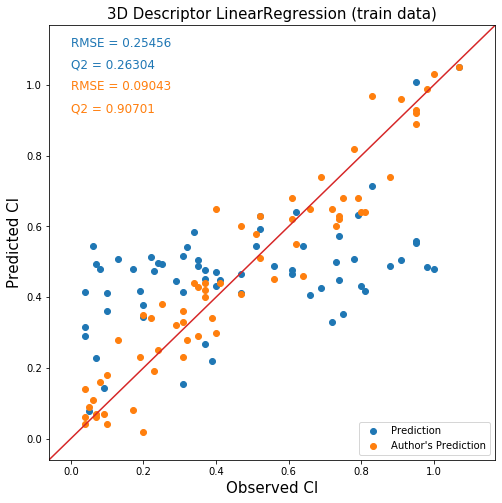

In [15]:
True_Pred_map(y_pred,"LinearRegression")

In [16]:
y_pred = reg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred,squared=False)
r2_test = r2_score(y_test,y_pred)

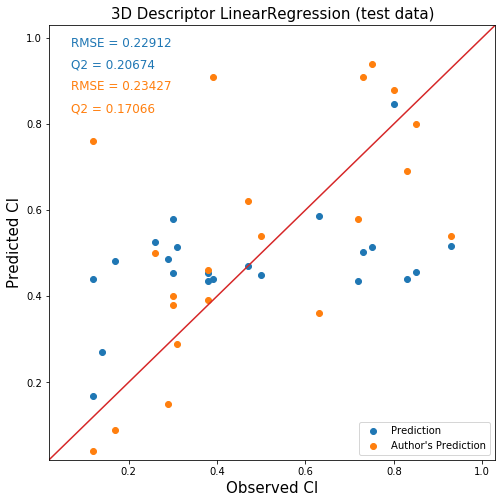

In [17]:
True_Pred_map(y_pred,"LinearRegression")

In [18]:
print("RMSE diff:", abs(rmse_train - rmse_test))
print("R2 diff:", abs(r2_train - r2_test))

RMSE diff: 0.025447793181949147
R2 diff: 0.056303953359613246


### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

def objective(trial):
    alpha = trial.suggest_loguniform("alpha", 1e0, 1e2)
    reg = Ridge(alpha=alpha,random_state=0)
    reg = LOOCV(reg)
    y_pred = reg.predict(X_train)
    return 1 - r2_score(y_train,y_pred)

study = optuna.create_study()
study.optimize(objective, n_trials=100)

print(study.best_params)
print(study.best_value)
print(study.best_trial)

[I 2020-10-27 11:43:24,278] A new study created in memory with name: no-name-d8bd7853-9506-4b55-90a2-ed0af5aa72f6
[I 2020-10-27 11:43:24,354] Trial 0 finished with value: 0.7570168055935612 and parameters: {'alpha': 20.56176762001691}. Best is trial 0 with value: 0.7570168055935612.
[I 2020-10-27 11:43:24,431] Trial 1 finished with value: 0.7782881329818048 and parameters: {'alpha': 81.64851775572356}. Best is trial 0 with value: 0.7570168055935612.
[I 2020-10-27 11:43:24,504] Trial 2 finished with value: 0.7695122154760707 and parameters: {'alpha': 56.040301125622996}. Best is trial 0 with value: 0.7570168055935612.
[I 2020-10-27 11:43:24,571] Trial 3 finished with value: 0.7479665077827136 and parameters: {'alpha': 2.950063316153083}. Best is trial 3 with value: 0.7479665077827136.
[I 2020-10-27 11:43:24,643] Trial 4 finished with value: 0.7539600967526143 and parameters: {'alpha': 13.111873969078907}. Best is trial 3 with value: 0.7479665077827136.
[I 2020-10-27 11:43:24,704] Trial 

In [20]:
reg = Ridge(alpha=study.best_params['alpha'],random_state=0)
reg = LOOCV(reg)

y_pred = reg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_pred,squared=False)
r2_train = r2_score(y_train,y_pred)

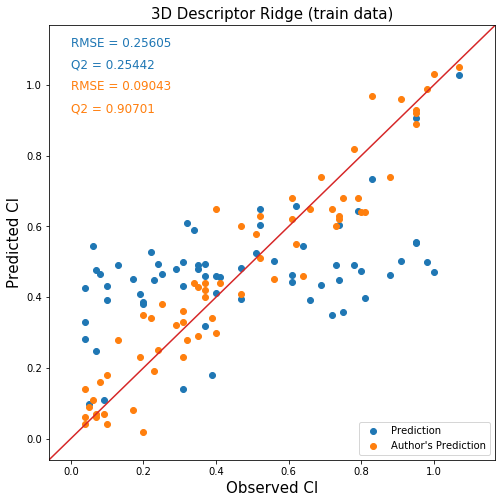

In [21]:
True_Pred_map(y_pred,"Ridge")

In [22]:
y_pred = reg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred,squared=False)
r2_test = r2_score(y_test,y_pred)

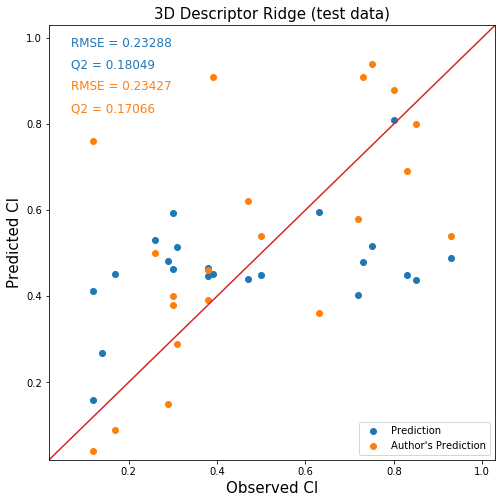

In [23]:
True_Pred_map(y_pred,"Ridge")

In [24]:
print("RMSE diff:", abs(rmse_train - rmse_test))
print("R2 diff:", abs(r2_train - r2_test))

RMSE diff: 0.023172952064754837
R2 diff: 0.07392913406985646


### Support Vector Regression

In [25]:
from sklearn.svm import SVR

def objective(trial):
    svr_c = trial.suggest_loguniform('svr_c', 1e0, 1e2)
    epsilon = trial.suggest_loguniform('epsilon', 1e-1, 1e1)
    reg = SVR(C=svr_c, epsilon=epsilon)
    reg = LOOCV(reg)
    y_pred = reg.predict(X_train)
    return 1 - r2_score(y_train,y_pred)

study = optuna.create_study()
study.optimize(objective, n_trials=100)

print(study.best_params)
print(study.best_value)
print(study.best_trial)

1.2606156291941308, 'epsilon': 0.1031435480672257}. Best is trial 8 with value: 0.3639202353864115.
[I 2020-10-27 11:43:33,466] Trial 11 finished with value: 0.5728773061366943 and parameters: {'svr_c': 1.1194513529988281, 'epsilon': 0.11483756590725167}. Best is trial 8 with value: 0.3639202353864115.
[I 2020-10-27 11:43:33,555] Trial 12 finished with value: 0.5833064451971083 and parameters: {'svr_c': 1.0014129503633424, 'epsilon': 0.11267016534794486}. Best is trial 8 with value: 0.3639202353864115.
[I 2020-10-27 11:43:33,643] Trial 13 finished with value: 0.5416083153793413 and parameters: {'svr_c': 2.938604641934225, 'epsilon': 0.17575503987441174}. Best is trial 8 with value: 0.3639202353864115.
[I 2020-10-27 11:43:33,724] Trial 14 finished with value: 0.5993330881048671 and parameters: {'svr_c': 2.7653156450505203, 'epsilon': 0.2183932754902849}. Best is trial 8 with value: 0.3639202353864115.
[I 2020-10-27 11:43:33,804] Trial 15 finished with value: 0.5550397478006727 and param

In [26]:
reg = SVR(C=study.best_params['svr_c'],epsilon=study.best_params['epsilon'])
reg = LOOCV(reg)

y_pred = reg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_pred,squared=False)
r2_train = r2_score(y_train,y_pred)

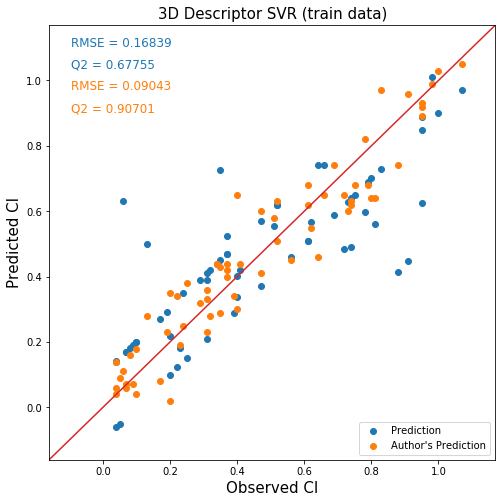

In [27]:
True_Pred_map(y_pred,"SVR")

In [28]:
y_pred = reg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred,squared=False)
r2_test = r2_score(y_test,y_pred)

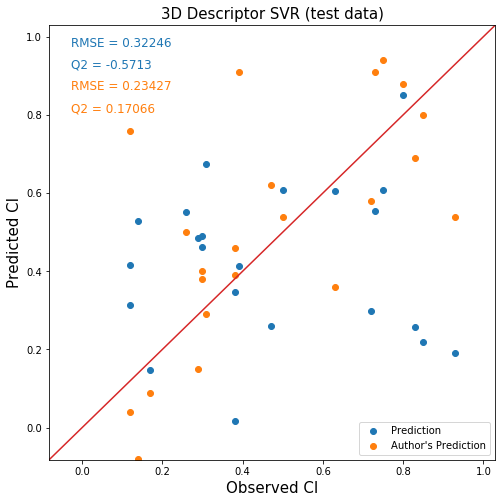

In [29]:
True_Pred_map(y_pred,"SVR")

In [30]:
print("RMSE diff:", abs(rmse_train - rmse_test))
print("R2 diff:", abs(r2_train - r2_test))

RMSE diff: 0.1540758677174667
R2 diff: 1.2488561861295424


### Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split", 2, 16)
    max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
    reg = RandomForestRegressor(min_samples_split=min_samples_split,max_leaf_nodes=max_leaf_nodes,criterion="mse",random_state=0)
    reg = LOOCV(reg)
    y_pred = reg.predict(X_train)
    return 1 - r2_score(y_train,y_pred)

study = optuna.create_study()
study.optimize(objective, n_trials=10)

print(study.best_params)
print(study.best_value)
print(study.best_trial)

[I 2020-10-27 11:43:46,041] A new study created in memory with name: no-name-591e2cc9-9eaa-4756-bb26-e0a6fac737d9
[I 2020-10-27 11:43:55,488] Trial 0 finished with value: 0.5266268245335484 and parameters: {'min_samples_split': 16, 'max_leaf_nodes': 32.0}. Best is trial 0 with value: 0.5266268245335484.
[I 2020-10-27 11:44:03,694] Trial 1 finished with value: 0.4857680035778058 and parameters: {'min_samples_split': 14, 'max_leaf_nodes': 48.0}. Best is trial 1 with value: 0.4857680035778058.
[I 2020-10-27 11:44:12,497] Trial 2 finished with value: 0.41370645435835374 and parameters: {'min_samples_split': 11, 'max_leaf_nodes': 24.0}. Best is trial 2 with value: 0.41370645435835374.
[I 2020-10-27 11:44:22,087] Trial 3 finished with value: 0.5699466223049864 and parameters: {'min_samples_split': 13, 'max_leaf_nodes': 4.0}. Best is trial 2 with value: 0.41370645435835374.
[I 2020-10-27 11:44:32,001] Trial 4 finished with value: 0.16548884709634226 and parameters: {'min_samples_split': 2, 'm

In [32]:
reg = RandomForestRegressor(min_samples_split=study.best_params['min_samples_split'],max_leaf_nodes=int(study.best_params['max_leaf_nodes']),criterion="mse",random_state=0)
reg = LOOCV(reg)

y_pred = reg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_pred,squared=False)
r2_train = r2_score(y_train,y_pred)

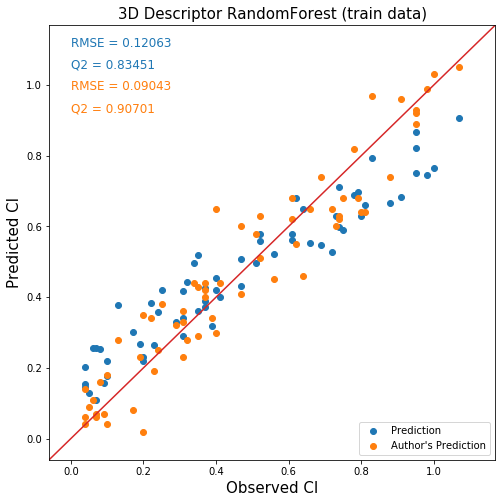

In [33]:
True_Pred_map(y_pred,"RandomForest")

In [34]:
y_pred = reg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred,squared=False)
r2_test = r2_score(y_test,y_pred)

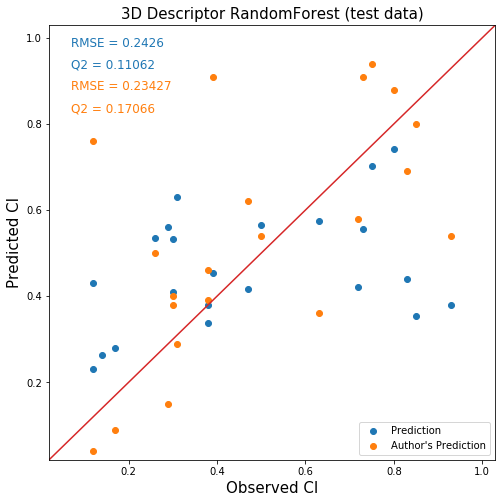

In [35]:
True_Pred_map(y_pred,"RandomForest")

In [36]:
print("RMSE diff:", abs(rmse_train - rmse_test))
print("R2 diff:", abs(r2_train - r2_test))

RMSE diff: 0.12196887745286561
R2 diff: 0.7238889011247955


### LightGBM

In [37]:
import optuna.integration.lightgbm as lgb_o
from sklearn.model_selection import train_test_split

rmse_min = np.inf
for train_index, test_index in loo.split(X_train):
    loo_x_train, loo_x_test = X_train[train_index], X_train[test_index]
    loo_y_train, loo_y_test = y_train[train_index], y_train[test_index]
    lgb_train = lgb_o.Dataset(loo_x_train, loo_y_train)
    lgb_val = lgb_o.Dataset(loo_x_test, loo_y_test)

    params = {'objective': 'regression',
            'metric': 'rmse',
            'verbose': -1} 

    gbm_o = lgb_o.train(params,
                        lgb_train,
                        valid_sets=lgb_val,
                        num_boost_round=10000,
                        early_stopping_rounds=100,
                        verbose_eval=200,)
    y_pred = gbm_o.predict(X_train,num_iteration=gbm_o.best_iteration)
    rmse = mean_squared_error(y_train, y_pred,squared=False)
    if rmse < rmse_min:
        rmse_min = rmse     
        best_model = gbm_o
gbm_o = best_model

mprove for 100 rounds
num_leaves, val_score: 0.257264:  90%|######### | 18/20 [00:02<00:00,  6.26it/s]Early stopping, best iteration is:
[1]	valid_0's rmse: 0.257264
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's rmse: 0.257264
Training until validation scores don't improve for 100 rounds
bagging, val_score: 0.257264:   0%|          | 0/10 [00:00<?, ?it/s]Early stopping, best iteration is:
[1]	valid_0's rmse: 0.257264
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's rmse: 0.257264
Training until validation scores don't improve for 100 rounds
bagging, val_score: 0.257264:  10%|#         | 1/10 [00:00<00:01,  8.77it/s]Early stopping, best iteration is:
[1]	valid_0's rmse: 0.714375
Training until validation scores don't improve for 100 rounds
bagging, val_score: 0.257264:  30%|###       | 3/10 [00:00<00:01,  6.48it/s]Early stopping, best iteration is:
[1]	valid_0's

In [38]:
y_pred = gbm_o.predict(X_train,num_iteration=gbm_o.best_iteration)

rmse_train = mean_squared_error(y_train,y_pred,squared=False)
r2_train = r2_score(y_train,y_pred)

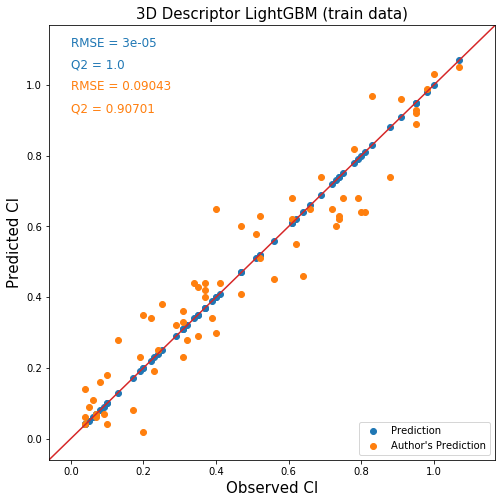

In [39]:
True_Pred_map(y_pred,'LightGBM')

In [40]:
y_pred = gbm_o.predict(X_test,num_iteration=gbm_o.best_iteration)
rmse_test = mean_squared_error(y_test,y_pred,squared=False)
r2_test = r2_score(y_test,y_pred)

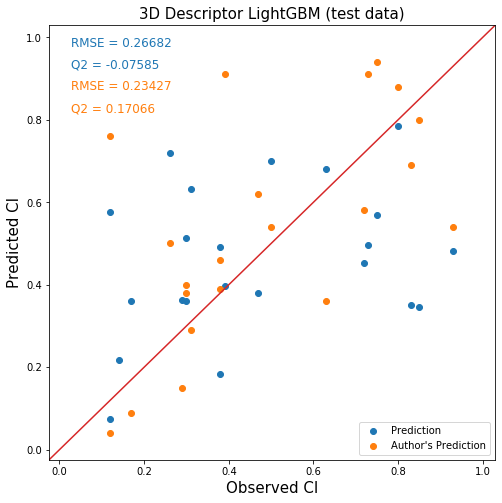

In [41]:
True_Pred_map(y_pred,'LightGBM')

In [42]:
print("RMSE diff:", abs(rmse_train - rmse_test))
print("R2 diff:", abs(r2_train - r2_test))

RMSE diff: 0.2667931980628545
R2 diff: 1.0758536128494836
